# Fraud  Loan Prediction

For Downloading Dataset (https://github.com/shubh2002/DataSets)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score


import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Fraud_loan_prediction.csv')

In [4]:
df.shape

(614, 13)

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.columns.groupby(df.dtypes)

{dtype('int64'): Index(['ApplicantIncome'], dtype='object'),
 dtype('float64'): Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
        'Credit_History'],
       dtype='object'),
 dtype('O'): Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'Property_Area', 'Loan_Status'],
       dtype='object')}

In [7]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [8]:
list=['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
for i in list:
    print(df[i].value_counts())
    print('\n')

Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


1.0    475
0.0     89
Name: Credit_History, dtype: int64


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Y    422
N    192
Name: Loan_Status, dtype: int64




In [9]:
df[df.isnull().any(axis=1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N


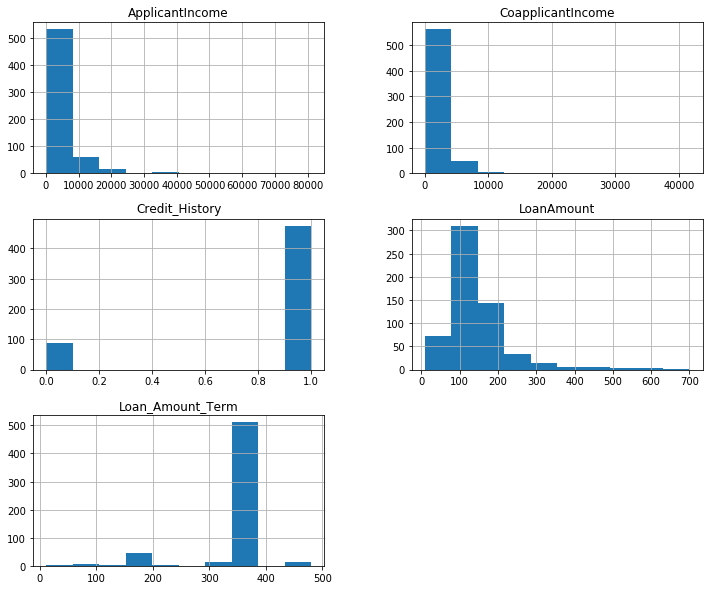

In [10]:
df.hist(figsize=(12,10))
plt.show()

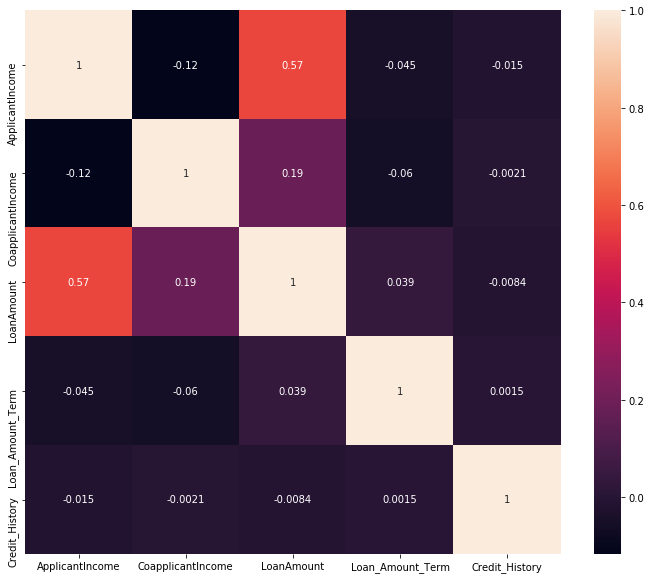

In [11]:
corr_heatmap=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_heatmap,annot=True)

In [12]:
df=df.drop(['Loan_ID'],axis=1)

In [13]:
df.columns[df.isnull().any()]

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [14]:
"""Filling missing value"""
list1=['Gender','Married','Self_Employed','Dependents']
list2=['LoanAmount','Loan_Amount_Term','Credit_History']
for i in list1:
    df[i]=df[i].fillna(df[i].mode()[0])
    
for j in list2:
    df[j]=df[j].fillna(df[j].median())

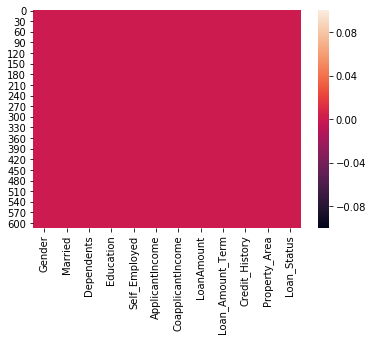

In [15]:
sns.heatmap(df.isnull())

In [16]:
obj_columns=df.columns[df.dtypes =='object']
obj_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
df=pd.get_dummies(data=df,columns=obj_columns,drop_first=True)

In [18]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [19]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [20]:
x=df.iloc[:,df.columns!='Loan_Status_Y']
x.shape

(614, 14)

In [21]:
y=df.iloc[:,df.columns=='Loan_Status_Y']
y.shape

(614, 1)

In [22]:
"""Scaling the data"""
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler(feature_range=(0,5))
x_scaled=scaling.fit_transform(x)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=40)

0.8116883116883117
0.7971014492753623


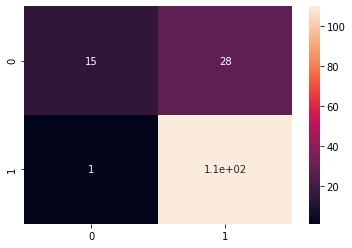

In [24]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
acc1=accuracy_score(y_test,y_pred)
pre1=precision_score(y_test,y_pred)
con1=confusion_matrix(y_test,y_pred)
print(acc1)
print(pre1)
sns.heatmap(con1,annot=True)

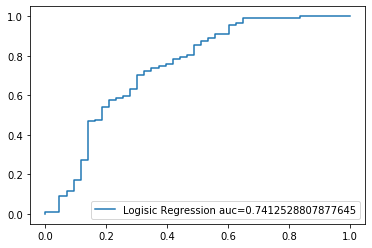

In [40]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_proba=model1.predict_proba(x_test)[::,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
auc=roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label='Logisic Regression auc='+str(auc))
plt.legend(loc=4)
plt.show()

0.7922077922077922
0.7925925925925926


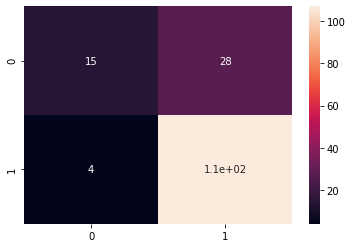

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
acc2=accuracy_score(y_test,y_pred)
pre2=precision_score(y_test,y_pred)
con2=confusion_matrix(y_test,y_pred)
print(acc2)
print(pre2)
sns.heatmap(con2,annot=True)

0.8051948051948052
0.7956204379562044


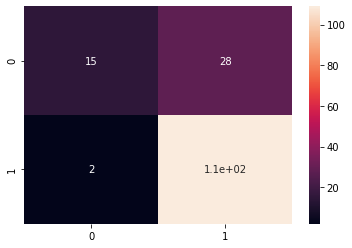

In [26]:
from sklearn.svm import SVC
model3=SVC()
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
acc3=accuracy_score(y_test,y_pred)
pre3=precision_score(y_test,y_pred)
con3=confusion_matrix(y_test,y_pred)
print(acc3)
print(pre3)
sns.heatmap(con3,annot=True)

0.6818181818181818
0.7767857142857143


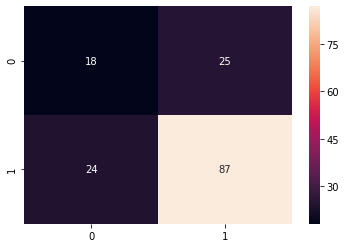

In [27]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier(criterion='entropy')
model4.fit(x_train,y_train)
y_pred=model4.predict(x_test)
acc4=accuracy_score(y_test,y_pred)
pre4=precision_score(y_test,y_pred)
con4=confusion_matrix(y_test,y_pred)
print(acc4)
print(pre4)
sns.heatmap(con4,annot=True)

0.7727272727272727
0.7923076923076923


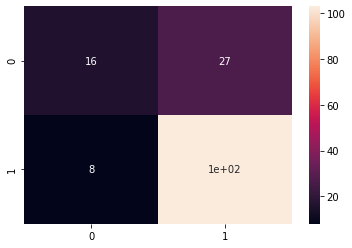

In [28]:
from sklearn.naive_bayes import GaussianNB
model5=GaussianNB()
model5.fit(x_train,y_train)
y_pred=model5.predict(x_test)
acc5=accuracy_score(y_test,y_pred)
pre5=precision_score(y_test,y_pred)
con5=confusion_matrix(y_test,y_pred)
print(acc5)
print(pre5)
sns.heatmap(con5,annot=True)

0.7532467532467533
0.792


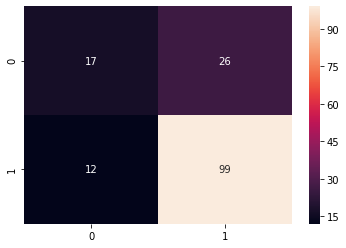

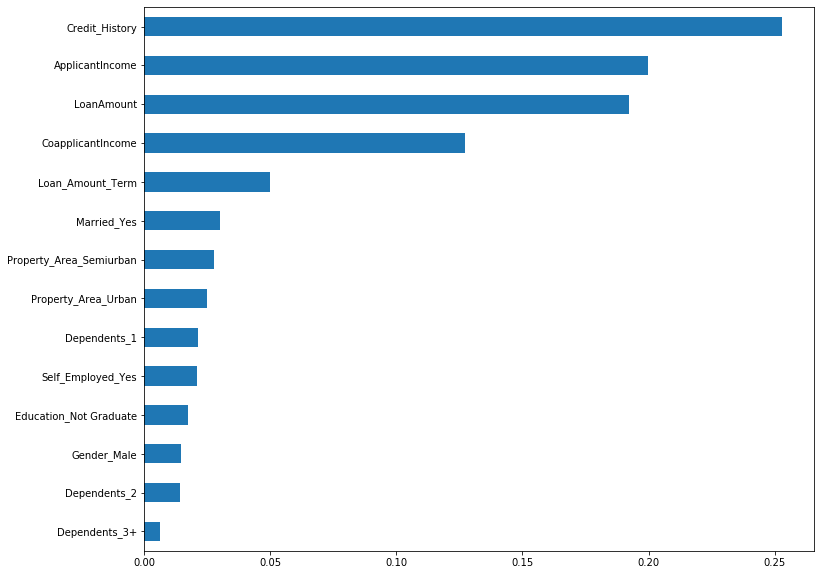

In [29]:
from sklearn.ensemble import RandomForestClassifier
model6=RandomForestClassifier()
model6.fit(x_train,y_train)
y_pred=model6.predict(x_test)
acc6=accuracy_score(y_test,y_pred)
pre6=precision_score(y_test,y_pred)
con6=confusion_matrix(y_test,y_pred)
print(acc6)
print(pre6)
sns.heatmap(con6,annot=True)
plt.figure(figsize=(12,10))
feat_imp=pd.Series(model6.feature_importances_,index=x.columns)
feat_imp=feat_imp.sort_values(ascending=True)
feat_imp.plot(kind='barh')



0.7532467532467533
0.7829457364341085


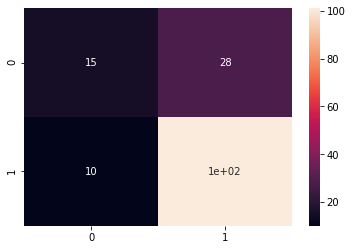

In [30]:
from sklearn.ensemble import AdaBoostClassifier
model7=AdaBoostClassifier()
model7.fit(x_train,y_train)
y_pred=model7.predict(x_test)
acc7=accuracy_score(y_test,y_pred)
pre7=precision_score(y_test,y_pred)
con7=confusion_matrix(y_test,y_pred)
print(acc7)
print(pre7)
sns.heatmap(con7,annot=True)


0.7727272727272727
0.7835820895522388


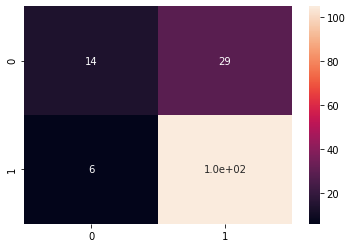

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
model8=GradientBoostingClassifier()
model8.fit(x_train,y_train)
y_pred=model8.predict(x_test)
acc8=accuracy_score(y_test,y_pred)
pre8=precision_score(y_test,y_pred)
con8=confusion_matrix(y_test,y_pred)
print(acc8)
print(pre8)
sns.heatmap(con8,annot=True)

0.8051948051948052
0.8


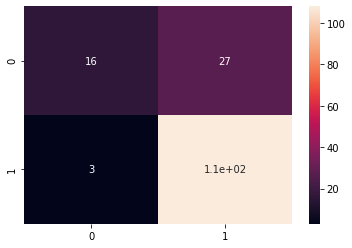

In [32]:
from xgboost import XGBClassifier
model9=XGBClassifier()
model9.fit(x_train,y_train)
y_pred=model9.predict(x_test)
acc9=accuracy_score(y_test,y_pred)
pre9=precision_score(y_test,y_pred)
con9=confusion_matrix(y_test,y_pred)
print(acc9)
print(pre9)
sns.heatmap(con9,annot=True)

In [33]:
from sklearn.model_selection import cross_val_score
CV=[]
models=[model1,model2,model3,model4,model5,model6,model7,model8,model9]
for i in models:
    score=cross_val_score(i,x,y,scoring='accuracy',cv=50)
    score=score.mean()
    CV.append(score)
CV

[0.8129720279720278,
 0.6221794871794871,
 0.689160839160839,
 0.7168181818181819,
 0.7917948717948718,
 0.77016317016317,
 0.7910606060606061,
 0.7921794871794872,
 0.7963403263403265]

In [34]:
from sklearn.model_selection import GridSearchCV
"""Using GridSearchCV for Random Forest"""
parameters=[{'n_estimators':[100,200,500,800,1000],'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6],'max_features':
            ['auto','sqrt','log2'],'n_jobs':[1,-1]}]
GS_random_forest=GridSearchCV(estimator=model6,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
GS_random_forest=GS_random_forest.fit(x_train,y_train)
score=GS_random_forest.best_score_
print(score)
parameters=GS_random_forest.best_params_
print(parameters)


0.808695652173913
{'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 500, 'n_jobs': -1}


In [35]:
"""Parameter tuning using in Decisio tree classifier"""
parameters=[{'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6],'max_features':['auto','sqrt','log2']}]
GS_Decision_tree=GridSearchCV(estimator=model4,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
GS_Decision_tree=GS_Decision_tree.fit(x_train,y_train)
score=GS_Decision_tree.best_score_
print(score)
parameters=GS_Decision_tree.best_params_
print(parameters)

0.7673913043478261
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2'}


In [44]:
result=pd.DataFrame({'MODELS':['Logistic Regression','KNeighbors','Support vector','Decision tree','Naive Bayes'
                                      ,'Random Forest','AdaBoost','Gradient Boosting','XGBoost'],
                             'PRECISION SCORE':[pre1,pre2,pre3,pre4,pre5,pre6,pre7,pre8,pre9],
                             'ACCURACY':[acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8,acc9],'CROSS VALIDATION':CV})
result.sort_values(by='PRECISION SCORE',ascending=False)

,MODELS,PRECISION SCORE,ACCURACY,CROSS VALIDATION
8,XGBoost,0.800000,0.805195,0.796340
0,Logistic Regression,0.797101,0.811688,0.812972
2,Support vector,0.795620,0.805195,0.689161
1,KNeighbors,0.792593,0.792208,0.622179
4,Naive Bayes,0.792308,0.772727,0.791795
5,Random Forest,0.792000,0.753247,0.770163
7,Gradient Boosting,0.783582,0.772727,0.792179
6,AdaBoost,0.782946,0.753247,0.791061
3,Decision tree,0.776786,0.681818,0.716818
